In [1]:
using LinearAlgebra
using SparseArrays
using PyPlot

In [2]:
# A has diagonal + nonzero first row and column
n = 8
Iv, Jv, Vv = Int64[], Int64[], Float64[]
for ind = 2:n
    push!(Iv, 1, ind)
    push!(Jv, ind, 1)
    push!(Vv, 0.01, 0.01)
end
for ind = 1:n
    push!(Iv, ind)
    push!(Jv, ind)
    push!(Vv, 1)
end
A = sparse(Iv, Jv, Vv, n, n)

8×8 SparseMatrixCSC{Float64,Int64} with 22 stored entries:
  [1, 1]  =  1.0
  [2, 1]  =  0.01
  [3, 1]  =  0.01
  [4, 1]  =  0.01
  [5, 1]  =  0.01
  [6, 1]  =  0.01
  [7, 1]  =  0.01
  [8, 1]  =  0.01
  [1, 2]  =  0.01
  [2, 2]  =  1.0
  [1, 3]  =  0.01
  [3, 3]  =  1.0
  [1, 4]  =  0.01
  [4, 4]  =  1.0
  [1, 5]  =  0.01
  [5, 5]  =  1.0
  [1, 6]  =  0.01
  [6, 6]  =  1.0
  [1, 7]  =  0.01
  [7, 7]  =  1.0
  [1, 8]  =  0.01
  [8, 8]  =  1.0

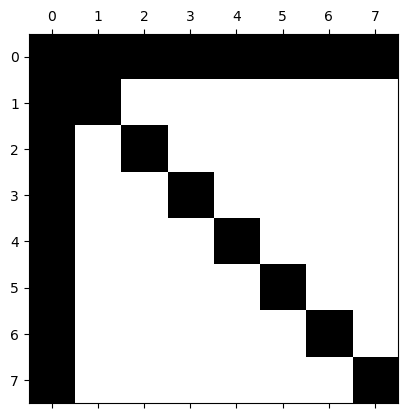

PyObject <matplotlib.image.AxesImage object at 0x7ff070dc6340>

In [3]:
spy(A)

In [4]:
# From https://docs.julialang.org/en/v1/stdlib/SparseArrays/
#=
struct SparseMatrixCSC{Tv,Ti<:Integer} <: AbstractSparseMatrix{Tv,Ti}
    m::Int                  # Number of rows
    n::Int                  # Number of columns
    colptr::Vector{Ti}      # Column j is in colptr[j]:(colptr[j+1]-1)
    rowval::Vector{Ti}      # Row indices of stored values
    nzval::Vector{Tv}       # Stored values, typically nonzeros
end
=#

In [5]:
cp = A.colptr
col1_inds = cp[1]:(cp[2]-1)
A.rowval[col1_inds], A.nzval[col1_inds]

([1, 2, 3, 4, 5, 6, 7, 8], [1.0, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01])

In [6]:
col2_inds = cp[2]:(cp[3]-1)
A.rowval[col2_inds], A.nzval[col2_inds]

([1, 2], [0.01, 1.0])

In [7]:
A_full = Matrix(A)

8×8 Array{Float64,2}:
 1.0   0.01  0.01  0.01  0.01  0.01  0.01  0.01
 0.01  1.0   0.0   0.0   0.0   0.0   0.0   0.0
 0.01  0.0   1.0   0.0   0.0   0.0   0.0   0.0
 0.01  0.0   0.0   1.0   0.0   0.0   0.0   0.0
 0.01  0.0   0.0   0.0   1.0   0.0   0.0   0.0
 0.01  0.0   0.0   0.0   0.0   1.0   0.0   0.0
 0.01  0.0   0.0   0.0   0.0   0.0   1.0   0.0
 0.01  0.0   0.0   0.0   0.0   0.0   0.0   1.0

In [8]:
inv(A_full)

8×8 Array{Float64,2}:
  1.0007    -0.010007    -0.010007    …  -0.010007    -0.010007
 -0.010007   1.0001       0.00010007      0.00010007   0.00010007
 -0.010007   0.00010007   1.0001          0.00010007   0.00010007
 -0.010007   0.00010007   0.00010007      0.00010007   0.00010007
 -0.010007   0.00010007   0.00010007      0.00010007   0.00010007
 -0.010007   0.00010007   0.00010007  …   0.00010007   0.00010007
 -0.010007   0.00010007   0.00010007      1.0001       0.00010007
 -0.010007   0.00010007   0.00010007      0.00010007   1.0001

In [9]:
L, U, p = lu(A_full)

LU{Float64,Array{Float64,2}}
L factor:
8×8 Array{Float64,2}:
 1.0    0.0          0.0         …   0.0          0.0         0.0
 0.01   1.0          0.0             0.0          0.0         0.0
 0.01  -0.00010001   1.0             0.0          0.0         0.0
 0.01  -0.00010001  -0.00010002      0.0          0.0         0.0
 0.01  -0.00010001  -0.00010002      0.0          0.0         0.0
 0.01  -0.00010001  -0.00010002  …   1.0          0.0         0.0
 0.01  -0.00010001  -0.00010002     -0.00010005   1.0         0.0
 0.01  -0.00010001  -0.00010002     -0.00010005  -0.00010006  1.0
U factor:
8×8 Array{Float64,2}:
 1.0  0.01     0.01     0.01         0.01        …   0.01         0.01
 0.0  0.9999  -0.0001  -0.0001      -0.0001         -0.0001      -0.0001
 0.0  0.0      0.9999  -0.00010001  -0.00010001     -0.00010001  -0.00010001
 0.0  0.0      0.0      0.9999      -0.00010002     -0.00010002  -0.00010002
 0.0  0.0      0.0      0.0          0.9999         -0.00010003  -0.00010003
 0.0

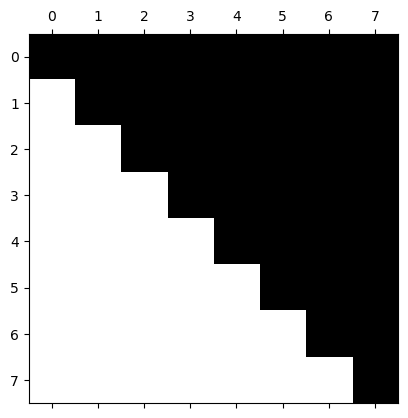

PyObject <matplotlib.image.AxesImage object at 0x7ff04045f040>

In [10]:
spy(U)

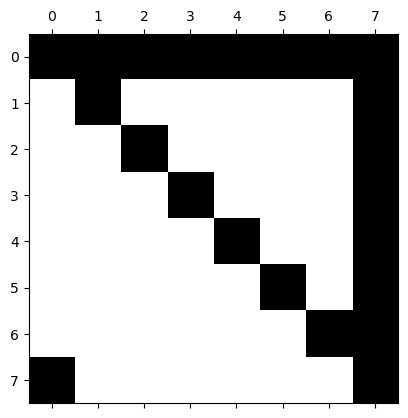

PyObject <matplotlib.image.AxesImage object at 0x7ff0804b3b50>

In [11]:
q = collect(1:n)
q[1] = n
q[n] = 1
AQ = A[:, q]
spy(AQ)

In [12]:
AQ_full = Matrix(AQ)
L, U, p = lu(AQ_full)

LU{Float64,Array{Float64,2}}
L factor:
8×8 Array{Float64,2}:
 1.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0
 0.0   1.0   0.0   0.0   0.0   0.0   0.0   0.0
 0.0   0.0   1.0   0.0   0.0   0.0   0.0   0.0
 0.0   0.0   0.0   1.0   0.0   0.0   0.0   0.0
 0.0   0.0   0.0   0.0   1.0   0.0   0.0   0.0
 0.0   0.0   0.0   0.0   0.0   1.0   0.0   0.0
 0.0   0.0   0.0   0.0   0.0   0.0   1.0   0.0
 0.01  0.01  0.01  0.01  0.01  0.01  0.01  1.0
U factor:
8×8 Array{Float64,2}:
 1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.01
 0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.01
 0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.01
 0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.01
 0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.01
 0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.01
 0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.01
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.9993

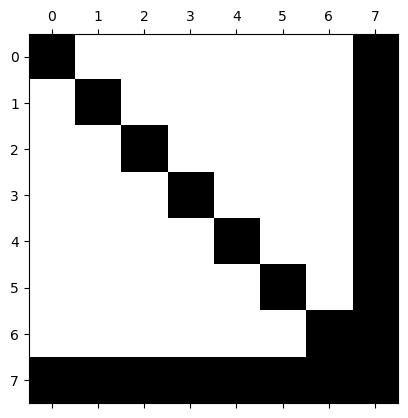

PyObject <matplotlib.image.AxesImage object at 0x7ff080627a60>

In [13]:
spy(AQ[p, :])